# 회귀분석 Regression Analysis

In [23]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
%precision 3

'%.3f'

In [26]:
boston = pd.read_csv('../data/boston_house_prices.csv')

In [27]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [28]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [29]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


# 2. 선형회귀 Linear Regression

## 2.1. OLS in scikit-leran 라이브러리

In [30]:
# OLS로 회귀계수 추정 form sklearn
model_ols = linear_model.LinearRegression()

model_ols.fit(boston.iloc[:,0:13], boston.MEDV)

LinearRegression()

In [31]:
# 회귀계수 출력
print(model_ols.coef_)
print(model_ols.intercept_)

[-1.080e-01  4.642e-02  2.056e-02  2.687e+00 -1.777e+01  3.810e+00
  6.922e-04 -1.476e+00  3.060e-01 -1.233e-02 -9.527e-01  9.312e-03
 -5.248e-01]
36.45948838508981


In [32]:
# 결정계수 R-squared 계산
model_ols.score(boston.iloc[:,0:13], boston.MEDV)

0.741

In [33]:
# MSE와 결정계수 계산
y_pred = model_ols.predict(boston.iloc[:, 0:13])
mse = mean_squared_error(boston.MEDV, y_pred)
mse

21.895

In [34]:
r2_score(boston.MEDV, y_pred)

0.741

## 2.2. OLS in statsmodels 라이브러리

In [35]:
# OLS로 회귀계수 추정 및 가설검정 from statsmodels
import statsmodels.api as sm
X = sm.add_constant(boston.iloc[:,0:13]) # 절편 추가
model = sm.OLS(boston.MEDV, X).fit()
print(model.summary)

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x166a37410>>


# 3 .Ridge Regression in sklearn 라이브러리

In [36]:
# sklearn 라이브러리를 이용하여 회귀계수 추정 (RIDGE)
# 오브젝트 생성
model_ridge = linear_model.Ridge()

# fit함수에서 파라미터 추정
model_ridge.fit(boston.iloc[:, 0:13], boston.MEDV)

Ridge()

In [37]:
# 회귀계수를 추정
print(model_ridge.coef_)
print(model_ridge.intercept_)

[-1.046e-01  4.744e-02 -8.805e-03  2.552e+00 -1.078e+01  3.854e+00
 -5.415e-03 -1.373e+00  2.901e-01 -1.291e-02 -8.761e-01  9.673e-03
 -5.333e-01]
31.597669818274223


# 4. 완성된 모델 평가하기

## 4.1. ols 결과

In [38]:
# 75%를 학습용, 25%를 검증용 데이터로 하기위해 분할
X_train, X_test, y_train, y_test = train_test_split(boston.iloc[:,0:13], boston.MEDV, test_size=0.25, random_state=100)

# 학습용 데이터에서 파라미터 추정
model_ols.fit(X_train, y_train)

# 작성한 모델로부터 예측(학습용, 검증용 모델 사용)
y_train_pred = model_ols.predict(X_train)
y_test_pred = model_ols.predict(X_test)

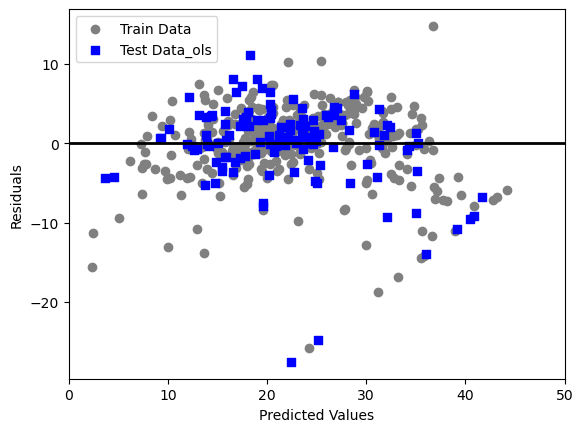

In [39]:
# 학습용, 검증용 각각에서 잔차를 플롯
plt.scatter(y_train_pred, y_train_pred - y_train, c='gray', marker='o', label='Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='blue', marker='s', label='Test Data_ols')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# 범례를 왼쪽 위에 표시
plt.legend(loc='upper left')

# y = 0의 직선을 그림
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([0,50])
plt.show()

In [40]:
# 학습용, 검증용 데이터에 대하여 평균제공오차를 출력
print('MSE Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

# 학습용, 검증용 데이터에 대하여 R^2를 출력
print('R^2 Train: %.3f, Test: %.3f' % (model_ols.score(X_train, y_train), model_ols.score(X_test, y_test)))

MSE Train: 20.507, Test: 27.173
R^2 Train: 0.742, Test: 0.725


## 4.2. ridge 결과

In [41]:
# 75%를 학습용, 25%를 검증용 데이터로 하기 위해 분할
X_train, X_test, y_train, y_test = train_test_split(boston.iloc[:,0:13], boston.MEDV, test_size=0.25, random_state=100)

# 학습용 데이터에서 파라미터 추정
model_ridge.fit(X_train, y_train)

# 작성한 모델로부터 예측(학습용, 검증용 모델 사용)
y_train_pred = model_ridge.predict(X_train)
y_test_pred = model_ridge.predict(X_test)

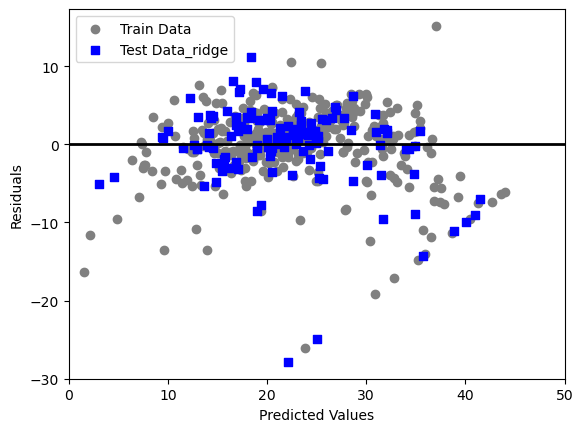

In [42]:
# 학습용, 검증용 각각에서 잔차를 플롯
plt.scatter(y_train_pred, y_train_pred - y_train, c='gray', marker='o', label='Train Data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='blue', marker='s', label='Test Data_ridge')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# 범례를 왼쪽 위에 표시
plt.legend(loc='upper left')

# y = 0의 직선을 그림
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([0,50])
plt.show()

In [43]:
# 학습용, 검증용 데이터에 대하여 평균제공오차를 출력
print('MSE Train: %.3f, Test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

# 학습용, 검증용 데이터에 대하여 R^2를 출력
print('R^2 Train: %.3f, Test: %.3f' % (model_ridge.score(X_train, y_train), model_ridge.score(X_test, y_test)))

MSE Train: 20.632, Test: 27.977
R^2 Train: 0.741, Test: 0.716
